### Data Cleaning
> We are going to use the `Kaggle` movie reviews to classify wether the review is positive or negative. [dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

### Dataset Path

In [2]:
path_ = r"C:\Users\crisp\Downloads\IMDB Dataset.csv\IMDB Dataset.csv"

### Loading the Data

In [3]:
dataframe = pd.read_csv(path_)
dataframe.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

### Cleaning the data
> We are interested in reviews and their sentiments. We want to convert sentiments into numbers either `1 for positive` and `0` for negative sentiment.

In [4]:
dataframe["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

> We only have 2 sentiment reviews, either ``positive`` or ``negative``

In [5]:
sentiments = dataframe["sentiment"].values
sentiments

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [6]:
sentiments = np.array([0 if i == "negative" else 1 for i in sentiments], dtype="float32")

In [7]:
sentiments[:10]

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

> Now we are done with sentiments, we want to move on to reviews.

* Reviews need to be cleaned interms of:
    * removing numbers and punctuations
    * html tags


In [8]:
reviews_raw = dataframe["review"].values
reviews_raw

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [9]:
test = reviews_raw[1]
test

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [10]:

d = re.sub(r'<[^>]+>', ' ', test) ## removing html tags
a = re.sub(r'[^a-zA-Z]',' ', d) # remove none word characters and numbers
b = re.sub(r'\s+', ' ', a) # replace at least 2 spaces with 1 space
c = re.sub(r'\s[^AaIi]{1}\s', ' ', b) #remove any word that is single and is not [a, i, ]
c

'A wonderful little production The filming technique is very unassuming very old time BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell murals decorating every surface are terribly well done '

> Our reviews are now looking cleaner, let's do this for all reviews

In [29]:
reviews = []
for review in reviews_raw:
    d = re.sub(r'<[^>]+>', ' ', review) 
    a = re.sub(r'[^a-zA-Z]',' ', d) 
    b = re.sub(r'\s+', ' ', a)
    c = re.sub(r'\s[^AaIi]{1}\s', ' ', b)
    reviews.append(c.lower())

In [30]:
len(reviews)

50000

In [31]:
reviews[:3]

['one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare forget pretty pi

### Splitting data into train and test

In [32]:
sentiments[:10]

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size= .2, random_state=42)

### Preparing the Embedding Layer

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [37]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
len(X_train[98])

236

> We set the maximum size of each list to `150`. The lists with size greater than 100 will be truncated to `150`. For the lists that have length less than `150`, we will add `0` at the end of the list until it reaches the max length. This process is called padding.

In [39]:
vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

90856

In [49]:
max_lenth = 200

In [50]:
X_train = pad_sequences(X_train, padding="post", maxlen=max_lenth)
X_test = pad_sequences(X_test, padding="post", maxlen=max_lenth)

In [51]:
len(X_test[0])

200

### GloVe word embedding

In [52]:
embeddings_dictionary = dict()
with open(r"C:\Users\crisp\Downloads\glove.6B\glove.6B.200d.txt", encoding='utf8') as glove_file:
    for line in glove_file:
        records = line.split()
        word  = records[0]
        vectors = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vectors
embeddings_dictionary

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [53]:
embedding_matrix = np.zeros((vocabulary_size, 200))

In [54]:
for word, index in tokenizer.word_index.items():
    vector = embeddings_dictionary.get(word)
    if vector is not None:
        embedding_matrix[index] = vector

### CREATING MODELS

In [57]:
import tensorflow as tf
from tensorflow import keras

### 1. Simple Neural Network

In [58]:
model = keras.Sequential([
    keras.layers.Embedding(
        vocabulary_size,
        200,
        weights=[embedding_matrix],
        trainable= False,
        input_length = max_lenth
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation= 'sigmoid')
])

In [63]:
model.compile(
    optimizer = keras.optimizers.Adam(lr=.001),
    metrics=["accuracy"],
    loss = keras.losses.BinaryCrossentropy()
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          18171200  
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 40001     
Total params: 18,211,201
Trainable params: 40,001
Non-trainable params: 18,171,200
_________________________________________________________________


In [67]:
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 2
VALIDATION_SPLIT = .2
history = model.fit(X_train, y_train, epochs= EPOCHS,
          batch_size= BATCH_SIZE, verbose=VERBOSE,
         validation_split=VALIDATION_SPLIT)

Epoch 1/5
250/250 - 7s - loss: 0.2566 - accuracy: 0.8998 - val_loss: 0.5600 - val_accuracy: 0.7598
Epoch 2/5
250/250 - 6s - loss: 0.2331 - accuracy: 0.9119 - val_loss: 0.5610 - val_accuracy: 0.7630
Epoch 3/5
250/250 - 6s - loss: 0.2137 - accuracy: 0.9233 - val_loss: 0.5895 - val_accuracy: 0.7552
Epoch 4/5
250/250 - 6s - loss: 0.1969 - accuracy: 0.9329 - val_loss: 0.6129 - val_accuracy: 0.7541
Epoch 5/5
250/250 - 6s - loss: 0.1911 - accuracy: 0.9319 - val_loss: 0.6134 - val_accuracy: 0.7592


In [68]:
score = model.evaluate(X_test, y_test, verbose=2)
score

313/313 - 2s - loss: 0.6251 - accuracy: 0.7513


[0.625128984451294, 0.7512999773025513]

> **The model is overfitting, it is `89%` accuracy on the train data and `76%` accurate on the test data**. Now lets visualise the model accuracy and model loss.

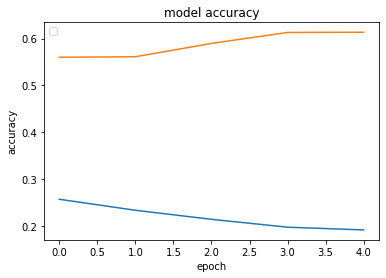

In [69]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

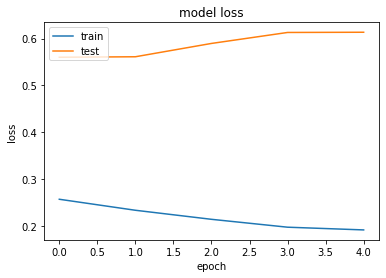

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 2. Convolutional Neural Network

In [104]:
model = keras.Sequential([
        keras.layers.Embedding(vocabulary_size,
                                200,
                                weights=[embedding_matrix],
                                trainable= False,
                                input_length = max_lenth
                              ),
        keras.layers.Conv1D(128, 5, activation='relu'),
        keras.layers.GlobalMaxPooling1D(),
        keras.layers.Dense(1, activation="sigmoid")
])

In [105]:
model.compile(
    optimizer = keras.optimizers.Adam(lr=.001),
    metrics=["accuracy"],
    loss = keras.losses.BinaryCrossentropy()
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          18171200  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 128)          128128    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 18,299,457
Trainable params: 128,257
Non-trainable params: 18,171,200
_________________________________________________________________


In [106]:
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 2
VALIDATION_SPLIT = .2
history = model.fit(X_train, y_train, epochs= EPOCHS,
          batch_size= BATCH_SIZE, verbose=VERBOSE,
         validation_split=VALIDATION_SPLIT)

Epoch 1/5
250/250 - 72s - loss: 0.4248 - accuracy: 0.8046 - val_loss: 0.3300 - val_accuracy: 0.8569
Epoch 2/5
250/250 - 71s - loss: 0.2973 - accuracy: 0.8765 - val_loss: 0.3049 - val_accuracy: 0.8692
Epoch 3/5
250/250 - 68s - loss: 0.2396 - accuracy: 0.9068 - val_loss: 0.3123 - val_accuracy: 0.8650
Epoch 4/5
250/250 - 67s - loss: 0.1994 - accuracy: 0.9265 - val_loss: 0.2973 - val_accuracy: 0.8723
Epoch 5/5
250/250 - 68s - loss: 0.1549 - accuracy: 0.9493 - val_loss: 0.3071 - val_accuracy: 0.8696


In [107]:
score = model.evaluate(X_test, y_test, verbose=2)
score

313/313 - 8s - loss: 0.3056 - accuracy: 0.8692


[0.305599570274353, 0.8691999912261963]

> **The model is overfitting, it is `94%` accuracy on the train data and `87%` accurate on the test data**. Now lets visualise the model accuracy and model loss.

### Making Predictions

In [127]:
instance = reviews[59]
instance

'i just watched the dresser this evening having only seen it once before about a dozen years ago it not a big movie and doesn try to make a big splash but my god the brilliance of the two leads leaves me just about speechless albert finney and tom courtenay are nothing less than amazing in this movie the dresser is the story of sir an aging shakespearean actor finney and his dresser norman courtenay sort of a valet putting on a production of king lear during the blitz of london in world war ii these are two men each dependent upon the other sir is almost helpless without the aid of norman to cajole wheedle and bully him into getting onstage for his th performance of lear and norman lives his life vicariously through sir without sir to need him he is nothing or thinks he is anyway this is a character driven film the plot is secondary to the interaction of the characters and as such it requires actors of the highest caliber to bring it to life finney only years old is completely believab

In [125]:
def makePrediction(instance):
    instance = tokenizer.texts_to_sequences(instance)
    flat_list = []
    for sublist in instance:
        for item in sublist:
            flat_list.append(item)
    instance = pad_sequences([flat_list], padding='post', maxlen=max_lenth)
    
    return model.predict(instance)
makePrediction(instance) 

array([[0.51428455]], dtype=float32)

### 3. Recurrent Neural Network (LSTM)
> Recurrent neural network is a type of neural networks that is proven to work well with sequence data. Since text is actually a sequence of words, a recurrent neural network is an automatic choice to solve text-related problems. In this section, we will use an LSTM (Long Short Term Memory network) which is a variant of RNN, to solve sentiment classification problem.

In [75]:
model = keras.Sequential([
        keras.layers.Embedding(vocabulary_size,
                                200,
                                weights=[embedding_matrix],
                                trainable= False,
                                input_length = max_lenth
                              ),
        keras.layers.LSTM(128),
        keras.layers.Dense(1, activation="sigmoid")
])

In [76]:
model.compile(
    optimizer = keras.optimizers.Adam(lr=.001),
    metrics=["accuracy"],
    loss = keras.losses.BinaryCrossentropy()
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 200)          18171200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,339,777
Trainable params: 168,577
Non-trainable params: 18,171,200
_________________________________________________________________


In [77]:
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 2
VALIDATION_SPLIT = .2
history = model.fit(X_train, y_train, epochs= EPOCHS,
          batch_size= BATCH_SIZE, verbose=VERBOSE,
         validation_split=VALIDATION_SPLIT)

Epoch 1/5
250/250 - 176s - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
250/250 - 168s - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6925 - val_accuracy: 0.5059
Epoch 3/5
250/250 - 162s - loss: 0.6925 - accuracy: 0.5126 - val_loss: 0.6931 - val_accuracy: 0.5065
Epoch 4/5
250/250 - 168s - loss: 0.6923 - accuracy: 0.5133 - val_loss: 0.6868 - val_accuracy: 0.5620
Epoch 5/5
250/250 - 178s - loss: 0.6944 - accuracy: 0.5143 - val_loss: 0.6933 - val_accuracy: 0.5000


In [78]:
score = model.evaluate(X_test, y_test, verbose=2)
score

313/313 - 28s - loss: 0.6935 - accuracy: 0.4961


[0.6934819221496582, 0.4961000084877014]

> **The model is not overfitting, it is `51%` accuracy on the train data and `50%` accurate on the test data**. Now lets visualise the model accuracy and model loss.

### Making Predictions

In [89]:
instance = reviews[10]
instance

'phil the alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines at first it was very odd and pretty funny but as the movie progressed i didn find the jokes or oddness funny anymore its a low budget film thats never a problem in itself there were some pretty interesting characters but eventually i just lost interest i imagine this film would appeal to a stoner who is currently partaking for something similar but better try brother from another planet '

In [90]:
def makePrediction(instance):
    instance = tokenizer.texts_to_sequences(instance)
    flat_list = []
    for sublist in instance:
        for item in sublist:
            flat_list.append(item)
    
    instance = pad_sequences([flat_list], padding='post', maxlen=max_lenth)
    
    return model.predict(instance)
    
makePrediction(instance)   

array([[0.4712513]], dtype=float32)